<a href="https://colab.research.google.com/github/LemonSqu33zy/MAT421/blob/main/Module_H_Section_22_4_22_5%2C_22_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

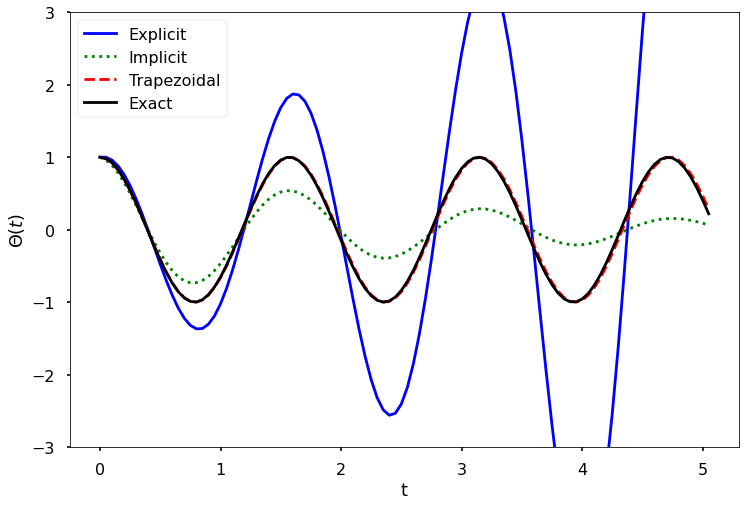

In [3]:
## Comparing accuracy and stability for numerical methods is important to make sure 
## the correct method is being used. The comparison of trapezoidal, implicit, and explicit
## Eulers shows that explicit and implicit are both the least accurate and least stable
## for this scenario (pendulum).
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline 
# define step size
h = 0.05
# define numerical grid
t = np.arange(0, 5.1, h)
# oscillation freq. of pendulum
w = 4
s0 = np.array([[1], [0]])

m_e = np.array([[1, h], 
               [-w**2*h, 1]])
m_i = inv(np.array([[1, -h], 
               [w**2*h, 1]]))
m_t = np.dot(inv(np.array([[1, -h/2], 
    [w**2*h/2,1]])), np.array(
      [[1,h/2], [-w**2*h/2, 1]]))

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

# do integrations
s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(0, len(t)-1):
    s_e[j+1, :] = np.dot(m_e,s_e[j, :])
    s_i[j+1, :] = np.dot(m_i,s_i[j, :])
    s_t[j+1, :] = np.dot(m_t,s_t[j, :])
    
plt.figure(figsize = (12, 8))
plt.plot(t,s_e[:,0],'b-')
plt.plot(t,s_i[:,0],'g:')
plt.plot(t,s_t[:,0],'r--')
plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-3, 3])
plt.xlabel('t')
plt.ylabel('$\Theta (t)$')
plt.legend(['Explicit', 'Implicit', \
            'Trapezoidal', 'Exact'])
plt.show()

In [4]:
# Python code for solving the differential equation using Predictor-Corrector Method. 
## This predicts the next output, then corrects the answer for increased accuracy. 
 
# consider the differential equation
# for a given x and y, return v
def f(x, y):
    v = y - 2 * x * x + 1;
    return v;
 
# predicts the next value for a given (x, y)
# and step size h using Euler method
def predict(x, y, h):
     
    # value of next y(predicted) is returned
    y1p = y + h * f(x, y);
    return y1p;
 
# corrects the predicted value
# using Modified Euler method
def correct(x, y, x1, y1, h):
     
    # (x, y) are of previous step
    # and x1 is the increased x for next step
    # and y1 is predicted y for next step
    e = 0.00001;
    y1c = y1;
 
    while (abs(y1c - y1) > e + 1):
        y1 = y1c;
        y1c = y + 0.5 * h * (f(x, y) + f(x1, y1));
 
    # every iteration is correcting the value
    # of y using average slope
    return y1c;
 
def printFinalValues(x, xn, y, h):
    while (x < xn):
        x1 = x + h;
        y1p = predict(x, y, h);
        y1c = correct(x, y, x1, y1p, h);
        x = x1;
        y = y1c;
 
    # at every iteration first the value
    # of for next step is first predicted
    # and then corrected.
    print("The final value of y at x =",
                     int(x), "is :", y);
 
# Driver Code
if __name__ == '__main__':
     
    # here x and y are the initial
    # given condition, so x=0 and y=0.5
    x = 0; y = 0.5;
 
    # final value of x for which y is needed
    xn = 1;
 
    # step size
    h = 0.2;
 
    printFinalValues(x, xn, y, h);

The final value of y at x = 1 is : 2.183872


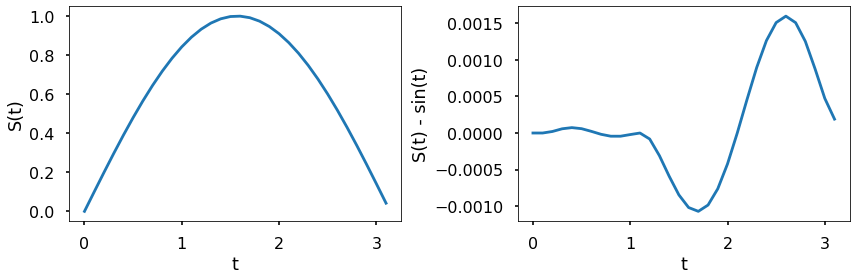

In [5]:
## This plots the difference between the solve_ivp solution and the actual solution.
## It helps visualize the error in pythod ODE solvers. 
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

plt.style.use('seaborn-poster')

%matplotlib inline

F = lambda t, s: np.cos(t)

t_eval = np.arange(0, np.pi, 0.1)
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()